### Going Deeper5. CAM(Class Activation Map)

기존의 딥러닝은 모델의 추론 근거를 알 수 없는 블랙박스 모델이었다. 

이번 시간에는 모델과 추론의 신뢰성에 대한 답을 찾는 XAI(Explainable Artificial Intelligence, 설명 가능한 인공지능) 분야에 대해서 알아본다.

- XAI 기법은 모델의 성능을 개선할 수 있는 단서로도 유용하게 활용될 수 있다.

### 5-2 Explainable AI

모델이 잘못된 답변을 준다면 어떻게 개선할 수 있을지, 잘 동작한다면 왜 이런 선택을 했는지 알고자 하는 것을 XAI(Explainable AI)라고 한다.

#### 이미지 분류 문제 (Image Classification)

분류 모델에 이미지가 입력으로 들어온다고 생각해본다.

1. 일반적인 분류 모델은 이미지의 local feature를 추출하기 위해 CNN으로 구성된 특성 추출용 백본 네트워크가 앞에 있다.  


2. 백본 네트워크에서 추출된 특성 맵(feature map)을 fully connected layer에 통과시켜서 얻어진 logit을 소프트맥스 활성화 함수에 통과시키면, 이미지가 각 클래스에 속할 확률을 얻을 수 있다.  


logit은 sigmoid의 역함수이고, softmax는 sigmoid를 K개의 클래스로 일반화한 것이다.

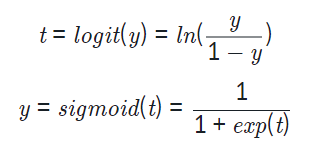

### 5-3 CAM: Class Activation Map

CAM이란 쉽게 말해서 `모델이 어떤 곳을 보고 어떤 클래스임을 짐작하고 있는지 확인할 수 있는 지도`이다. CAM은 `GAP`을 사용했다. 

1. GAP(Global Average Pooling)
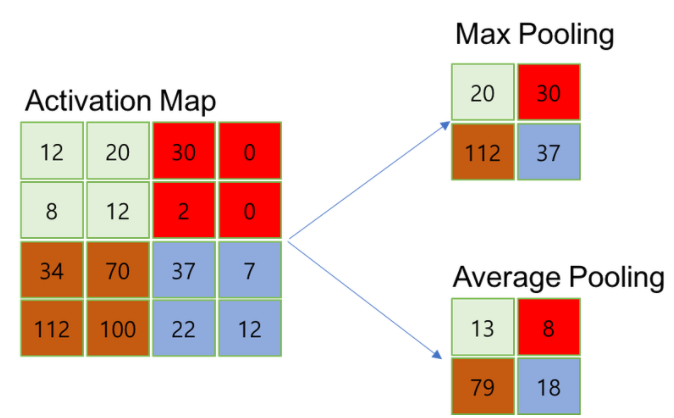

일반적인 이미지 분류는 여러 CNN 레이어를 거쳐 특성을 추출하고, 그 특성 맵을 flattening하고 fully connected layer에 입력해 줌으로써 각 클래스에 따른 logit을 구하고 최종적으로 활성화 함수를 거치게 된다.  

그러나 Network in Network 논문에서는 CNN 이후에 fully connected layer 대신에 GAP 연산을 하게 된다.  


1. GAP은 매 채널별로 average pooling을 채널의 값 전체에 global하게 적용한다.  


2. 크기가 6x6이고 채널이 3개인 특성맵에 대해서 GAP을 수행하게 되면 각 채널이 딱 한 개의 숫자로 요약되어서 1x1 크기의 채널이 3개인 벡터를 얻는다.  


3. 이때 결과 벡터의 각 차원의 값은 6x6 크기의 특성 맵을 채널별로 평균을 낸 값이다.  


이에 대한 장점으로는 특성 맵의 각 채널이 클래스별 신뢰도를 나타내게 되어서 해석이 쉽게 fully connected layer와 다르게 최적화할 파라미터가 존재하지 않기 때문에 과적합(overfitting)을 방지할 수 있다고 한다.

### CAM

`CAM(Class Activation Map)`은 클래스가 활성화되는 지도이다. 일반적인 CNN은 커널 윈도우에 따라서 특성을 추출하기 때문에 CNN 레이어를 거친 특성 맵에서도 입력값은 위치정보가 유지된다.  

따라서 특성 맵의 정보를 `이미지 검출`이나 `세그멘테이션` 등의 문제를 푸는데 이용하기도 한다.

CAM을 얻을 수 있는 네트워크를 알아보자.

1. 먼저 CNN 레이를 거쳐서 뽑아낸 특성 맵에 대해서 GAP을 적용한다. 이에 대해서 소프트맥스 레이어(bias가 없는 fully connected)를 적용한다.  


2. CNN을 거친 특성맵에서 각 클래스에 대한 정보는 결과값의 여러 채널에 걸쳐서 나타나게 되는데 GAP을 통해서 각 채널별 정보를 요약하게 되면 소프트맥스 레이어는 이 정보를 보고 각 클래스에 대한 개별 채널의 중요도를 결정하게 된다.


3. 이렇게 클래스 별로 소프트맥스 레이어를 통해 각 채널의 가중합을 구하면 각 클래스가 활성화 맵의 어떤 부분을 활성화 시킬지 확인할 수 있게된다.  


4. 이렇게 얻은 특성 맵은 CNN 출력값 크기와 같다. 이를 보간을 통해서 적절히 원본 이미지 크기로 확대하면 위와 같은 CAM을 얻게 된다.  


```
CAM을 얻기 위해서는 위처럼 클래스별 점수를 얻기 위해 모든 위치의 활성화 정도를 더해준 것과 달리 각 x, yx,y 위치에서 kk개의 채널만 더해주어 위치 정보가 남도록 합니다. 이를 통해서 얻어진 CAM은 각 위치에서 채널별 활성화 정도의 가중합인 M_c(x,y)M 
c
​
 (x,y)가 됩니다. M_c(x,y)M 
c
​
 (x,y)은 모델이 클래스 cc에 대해 각 위치를 얼마나 보고 있는지 나타내는 것이지요.
```
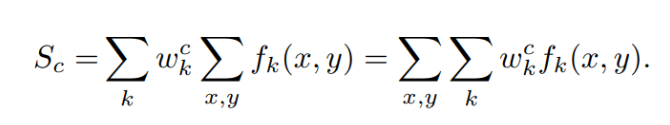
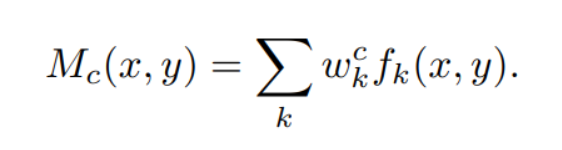

## 5-4 Grad-CAM

Grad-CAM(Gradient CAM)은 CAM의 모델의 구조가 제한되는 문제를 해결하고, 다양한 모델의 구조를 해석할 수 있는 방법이다.

Grad-CAM을 사용하면 CNN 기반의 네트워크는 굳이 `모델 구조를 변경할 필요`가 없고, 분류 문제 외에 `다른 태스크들에 유연하게 대처`할 수 있다.

#### 그래디언트를 통한 Weight Score 계산

Grad-CAM에서는 `그래디언트(Gradient)`를 사용한다. 원하는 클래스에 대해서 관찰하는 레이어로 들어오는 그래디언트를 구할 수 있다면 해당 클래스를 활성화할 때, 레이어의 특성 맵에서 어떤 채널이 중요하게 작용할 수 있는지를 알 수 있다.

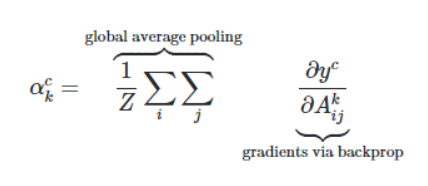
(y은 모델의 출력값, A는 활성화맵, i,j는 각 x,y축, Z는 전체 map크기)

위 식은 클래스에 대해 backpropagation을 통해서 얻은 k번째 채널의 그래디언트를 사용해서 가중치 점수(Weight score)를 구하는 식이다.

이 가중치를 구하기 위해 CAM처럼 별도의 weight 파라미터를 도입할 필요가 없다는 것을 알 수 있다. 그 방법으로는 

k 번째 활성화 맵과 이 가중치를 곱해주어 합한 뒤 ReLU 활성화 함수를 통해서 클래스에 따른 Grad-CAM을 얻게된다.

## 5-5. ACoL: Adversarial Complementary Learning

직접적으로 정답 위치 정보를 주지 않아도 간접적인 정보를 활용하여 학습하고 원하는 정보를 얻어낼 수 있도록 모델을 학습하는 방식을 `약지도학습`이라고 한다.

#### 1) 약지도학습(weakly supervised learning)
- `incomplete supervision` : 학습 데이터 중 일부에만 라벨이 달린 경우.(준지도학습과 같은 경우)  

- `inexact supervision` : 학습 데이터의 라벨이 충분히 정확하게 달려있지 않은 경우. (이미지 내 bounding box 없이 라벨로 달려있는 경우)  


- `inaccurate supervision` : 학습 데이터에 Noise가 있는 경우. (라벨이 잘못 달린 경우)  


지금은 `inexact supervision`에 대해 알아본다. 

아이디어에 대해서 말해보겠다. 

1. Grad-CAM을 통해서는 개와 고양이의 특징이 두드러지게 하는 영역의 가중치 점수를 계산할 수 있었지만 해당 가중치 점수를 제거하면 Image Classification 모델에서 해당 클래스에 대한 prediction이 바뀌게 할 수 있다.  


2. 가중치 점수를 제거했을 때 prediction이 바뀌도록 하는 가중치 영역을 모으면 bounding box 라벨을 한번도 보지 않고 object detection을 해낼 수 있다는 것이다.  


위와 비슷한 논리로 Semantic Segmentation도 수행 가능함을 보여준다.
https://arxiv.org/pdf/1610.02391.pdf
https://www.naverlabs.com/storyDetail/16


#### 2) Adversarial Complementary Learning
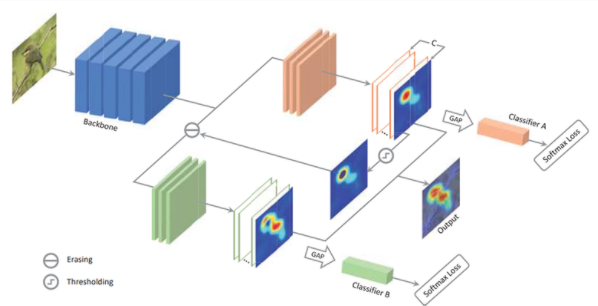

`Adversarial`은 `적대적인` 이라는 뜻이다. 

`ACoL`은 모델의 학습에는 끝단이 두 브랜치(branch)로 나뉜다. CAM을 만들기 위해 활용한 특성 맵을 두가지로 분리한 것이다.


`CAM과 Grad-CAM의 문제점`은 활성화 맵을 봤을 때 가장자리 보다는 특징을 주로 나타나는 위치에 중점적으로 활성화되는 모습을 볼 수 있다.

이를 해결하기 위해 `ACoL`은 `브랜치를 두가지로 두어 너무 높은 점수를 지워줌`으로써 주변의 특성을 반영하도록 했다. 이 과정이 Adversial, 적대적인 학습방법이다.

1. ACoL의 구조를 알아보자. 먼저 브랜치를 거친다. 특성 맵은 GAP을 거쳐서 소프트맥스 레이어인 `Classifier A`를 거친다. 이 브랜치는 loss로 학습된다.  


2. `Classifier A`는 전체적인 이미지를 보고 클래스를 판별할 수 있고 `Classifier B`는 A의 CAM에서 크게 활성화도니 영역을 지운 활성화 맵에서 분류한다(어려운 문제).  


3. 위의 두가지 Classifier를 학습시킴으로써 넓은 영역을 판별의 근거로 삼을 수 있다. 이 과정을 통해 Adversatial omplementary Learning 과정을 거치게 된다.  

##### 결과적으로 ACoL은 물체의 전반적인 영역으로 CAM이 활성화되는 효과를 확인할 수 있다.


#### 3) 1x1 Conv

기존의 CAM에서는 물체 검출을 위함 모델로 사용하기 위해서 모델의 feed forward 외 별도의 연산을 해줘야하는 단점이 있었다.


ACoL에서는 이를 개선하기 위해 `커널 사이즈는 1x1, 출력 채널의 개수는 분류하고자 하는 클래스 개수`를 가진 컨볼루션 레이어를 특성맵에 사용하고 GAP을 적용해서 Network in Network에서 본 구조와 유사한 방식을 사용한다.

여기서 나온 컨볼루션 레이어의 출력값은 바로 활성화 맵이 된다. 